# Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In this assignment I am going to describe the distributions of Vitamin D levels, Doc Visits, and Total Charge for a medical dataset. 

In [2]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1APV3pXiAszS_0mSgkiEt9IUNH-QmyX7KwxSAwuADl6Y/gviz/tq?tqx=out:csv&sheet=medical_data')
df = df[['VitD_levels', 'Doc_visits', 'TotalCharge']]
df.head()

,VitD_levels,Doc_visits,TotalCharge
0,19.141466,6,3726.702860
1,18.940352,4,4193.190458
2,18.057507,4,2434.234222
3,16.576858,4,2127.830423
4,17.439069,5,2113.073274


# Graph Function
Since I am going to create the same graph for each column, I am going to create a function to call 

In [3]:
def distribution(data, column):
    """A Function to create a distribution plot for a given column of a dataframe."""
    # Creating the needed measures of central tendency and dispersion
    feature = df[column]
    mean = feature.mean()
    std = feature.std()
    median = feature.median()
    stdplus1 = mean + std
    stdminus1 = mean - std
    
    # plotting the measures in a graph
    fig, ax = plt.subplots(figsize = (12,8))
    sns.histplot(data = feature, ax = ax, stat = 'probability', kde = True)
    ax.axvline(mean, color = 'red', label = f'Mean: {mean:,.2f}')
    ax.axvline(median, color = 'green', label = f'Median: {median:,.2f}', ls = '--')
    ax.axvline(stdminus1, color = 'black', label = f'-1 std: {stdminus1:,.2f}')
    ax.axvline(stdplus1, color = 'black', label = f'+1 std: {stdplus1:,.2f}')
    ax.axvspan(stdminus1, stdplus1, color = 'yellow', zorder = 0)
    ax.set_title(column)
    ax.legend();
    

# Vitamin D Levels

## Graph

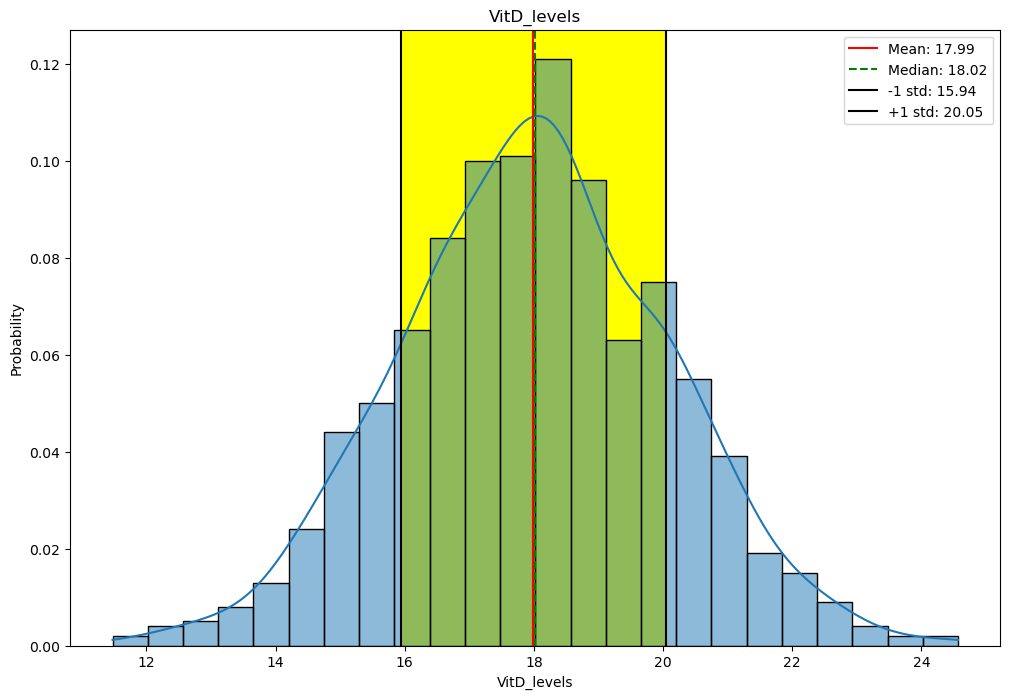

In [4]:
distribution(df, 'VitD_levels')

## Is it Discrete or Continuous?
This column is continuous

## Does it have a Skew? If so, which direction?
This column does not have a skew, since the median and mean are basicaly the same

## What type of kurtosis does it display?

In [5]:
kurtD = stats.kurtosis(df['VitD_levels'], fisher = False)
kurtD

3.013147515833447

I used the Pearson Calculation for Kurtosis. Because the kurtosis calculation is right about 3.0, we can say that this column has a Mesokurtic kurtosis classification. 

# Doc Visits

## Graph

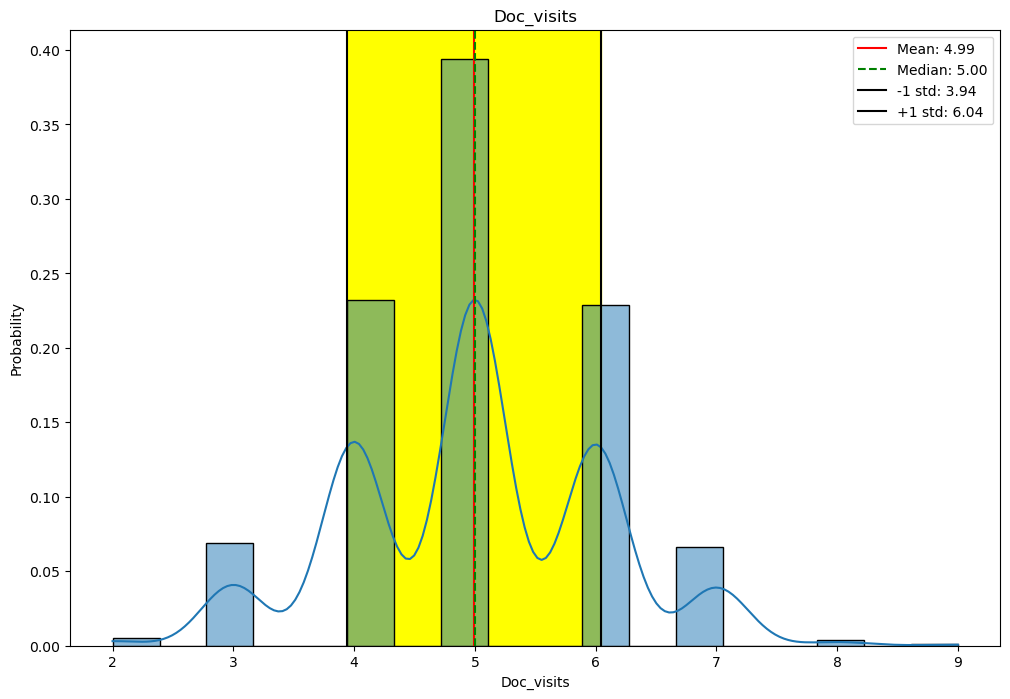

In [6]:
distribution(df, 'Doc_visits')

## Is it Discrete or Continuous
This column is discrete

## Does it have a skew? If so, which direction?
This data point does not have a skew because the median and mean are both almost identical. 

## What type of kurtosis does it display?

In [7]:
kurtDoc = stats.kurtosis(df['Doc_visits'], fisher = False)
kurtDoc

2.9919958083381206

Using the same calculation as before, this column also has Mesokurtic Kurtosis, since the value for kurtosis was 2.99 and that approximates to 3

# Total Charge

## Graph

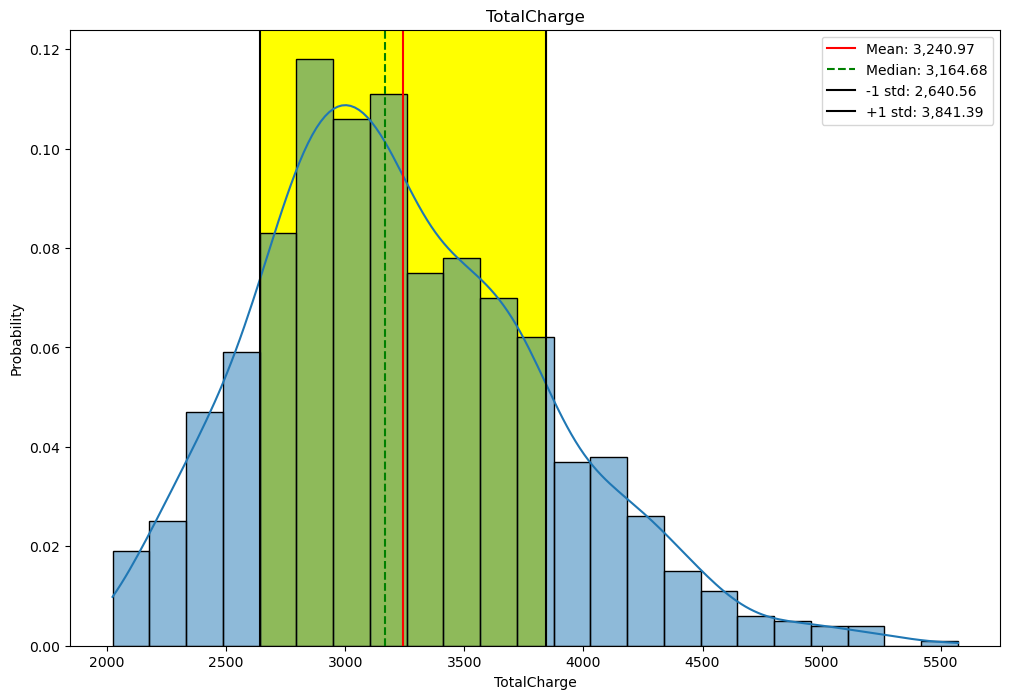

In [8]:
distribution(df, 'TotalCharge')

## Is it Discrete or Continuous?
This column is continuous

## Does it have a skew? If so, which direction?
Because the mean is greater than the median, and the values have a tail towards the positive side, the column has a slight positive skew.

## What type of kurtosis does it display?

In [9]:
kurtTotal = stats.kurtosis(df['TotalCharge'], fisher = False)
kurtTotal

3.2650077463439384

This column has a kurtosis above 3, so it has Leptokurtic Kurtosis